# Use CNN to detect breast cancer 

In [201]:
# General packages
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import random

from matplotlib.image import imread
import cv2

# Packages for ML
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
# from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D


In [202]:
fd = '../ECE 228/archive/IDC_regular_ps50_idx5'

imagePatches = glob(fd + '/**/*.png', recursive=True)
for filename in imagePatches[0:5]:
    print(filename)

../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1051_y2401_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x2951_y951_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3001_y1451_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3051_y801_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x951_y1901_class0.png


In [203]:
len(imagePatches)

277524

In [204]:
# bin the data to cancer and no cancer

class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

display('Size of the class 0 = ',len(class0))
display('Size of the class 1 = ',len(class1))

'Size of the class 0 = '

198738

'Size of the class 1 = '

78786

In [205]:
# randomly select 1000 images from each class

num_sample_selected = 10000
rand_sample_class0 = random.sample(class0, num_sample_selected)
rand_sample_class1 = random.sample(class1, num_sample_selected)


In [206]:
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = imread(i )
            img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

In [207]:
class0_array = get_image_arrays(rand_sample_class0, 0)
class1_array = get_image_arrays(rand_sample_class1, 1)

In [208]:
len(class0_array)

10000

(50, 50, 3)

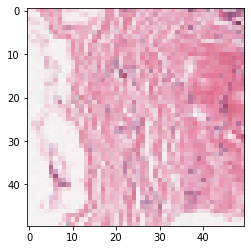

In [209]:
#test = cv2.imread(fd + '/13689/1/13689_idx5_x801_y1501_class1.png' ,cv2.IMREAD_COLOR)
plt.imshow(class0_array[0][0])

display(test.shape)

In [210]:
combined_data = np.concatenate((class0_array, class1_array))
random.seed(10)
random.shuffle(combined_data)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [211]:
combined_data.shape

(20000, 2)

In [212]:
X = []
y = []

for i in range(combined_data.shape[0]):
    X.append(combined_data[i][0])
    y.append(combined_data[i][1])



In [213]:
X = np.array(X).reshape(-1, 50, 50, 3)

In [214]:
X.shape

(20000, 50, 50, 3)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15000, 50, 50, 3) (5000, 50, 50, 3) (15000, 2) (5000, 2)


In [216]:
def create_model():        
    model = Sequential()
    model.add(Conv2D(filters = 8, kernel_size=3, activation='relu', input_shape=(50,50,3)))
    #model.add(Conv2D(filters = 8, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(2, activation="softmax"))
    adam = Adam(learning_rate=0.01)
    #model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])   
    model.compile(loss="MeanSquaredError", optimizer=adam, metrics=['accuracy'])     


    return model

In [217]:
model = create_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= 20,
    verbose = 2,
)

Epoch 1/20
469/469 - 4s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 4s/epoch - 9ms/step
Epoch 2/20
469/469 - 4s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 4s/epoch - 8ms/step
Epoch 3/20
469/469 - 3s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 3s/epoch - 7ms/step
Epoch 4/20
469/469 - 3s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 3s/epoch - 7ms/step
Epoch 5/20
469/469 - 3s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 3s/epoch - 7ms/step
Epoch 6/20
469/469 - 3s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 3s/epoch - 7ms/step
Epoch 7/20
469/469 - 4s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 4s/epoch - 8ms/step
Epoch 8/20
469/469 - 4s - loss: 0.1545 - accuracy: 0.8455 - val_loss: 0.1624 - val_accuracy: 0.8376 - 4s/epoch - 8ms/step
Epoch 9/20
469/469 - 4s 

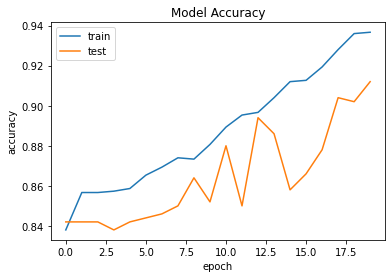

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()